In [1]:
# import the packages
from tsv_data_analytics import tsvutils
from tsv_data_analytics_ext import graphext
import statistics

In [2]:
# read data. this is the famouse iris dataset
# the read() method should be used in general that takes a tsv of gzip compressed tsv
# x = read("/path/to/tsv-file.tsv.gz")
# or
# x = read("s3://bucket/path/to/tsv-file.tsv.gz")
x = tsvutils.read_url("https://github.com/CrowdStrike/tsv-data-analytics/raw/main/notebooks/iris.tsv")

In [3]:
# show raw data
x.sample_rows(10).export_to_df(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,2.5,3.0,1.1,Iris-versicolor
1,7.3,2.9,6.3,1.8,Iris-virginica
2,5.4,3.7,1.5,0.2,Iris-setosa
3,5.6,3.0,4.5,1.5,Iris-versicolor
4,7.4,2.8,6.1,1.9,Iris-virginica


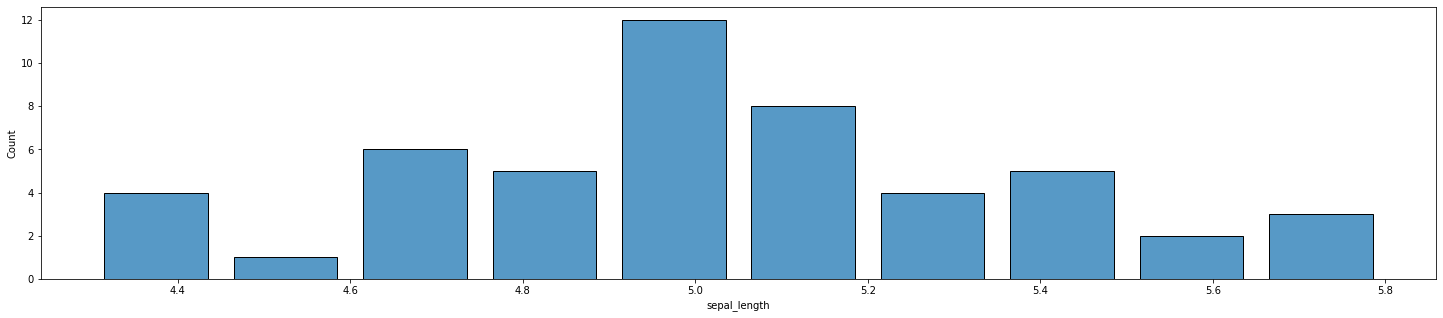

In [4]:
# simple histogram on columns
x1 = x \
    .eq_str("class", "Iris-setosa")

graphext.histogram(x1, "sepal_length")

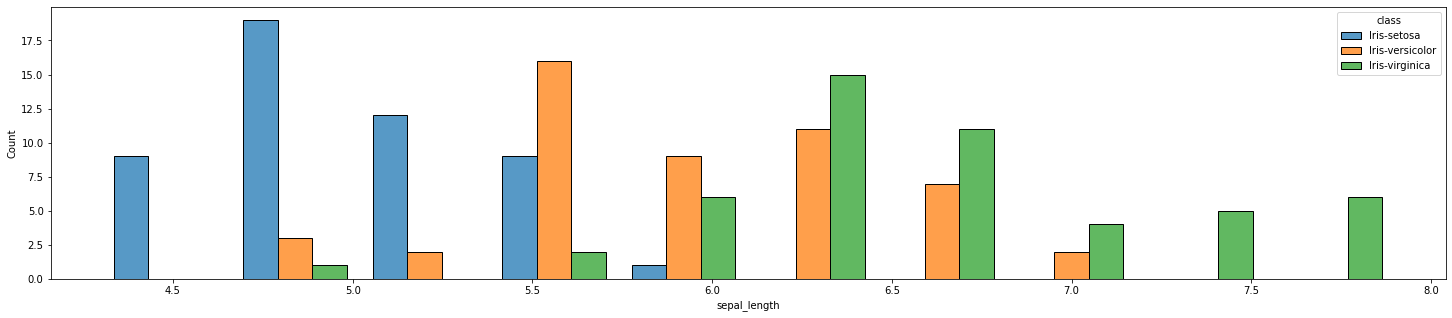

In [5]:
# multiple classes data based histogram
graphext.histogram(x, "sepal_length", "class")

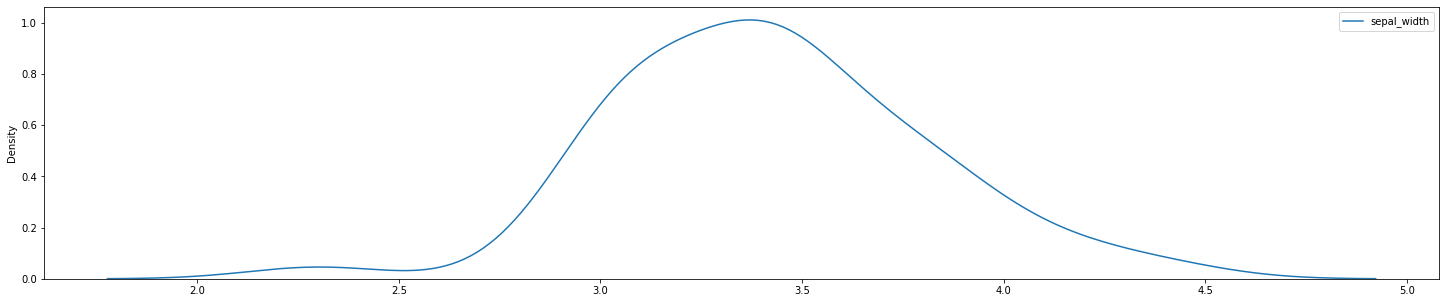

In [6]:
# density plot
x2 = x \
    .eq_str("class", "Iris-setosa")

graphext.density(x2, "sepal_width")

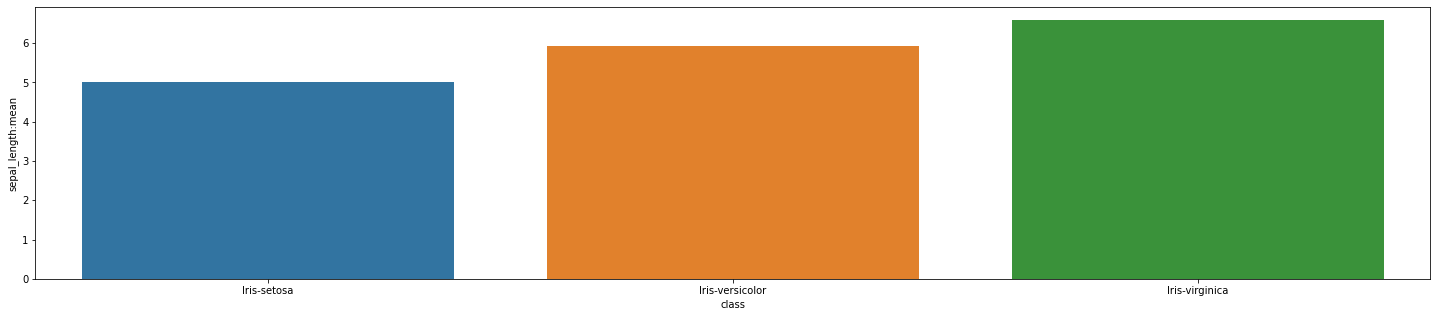

In [7]:
# compute simple statistics and use it for visualization
x3 = x \
    .aggregate("class", ["sepal_length"], [statistics.mean])

graphext.barchart(x3, "class", "sepal_length:mean")

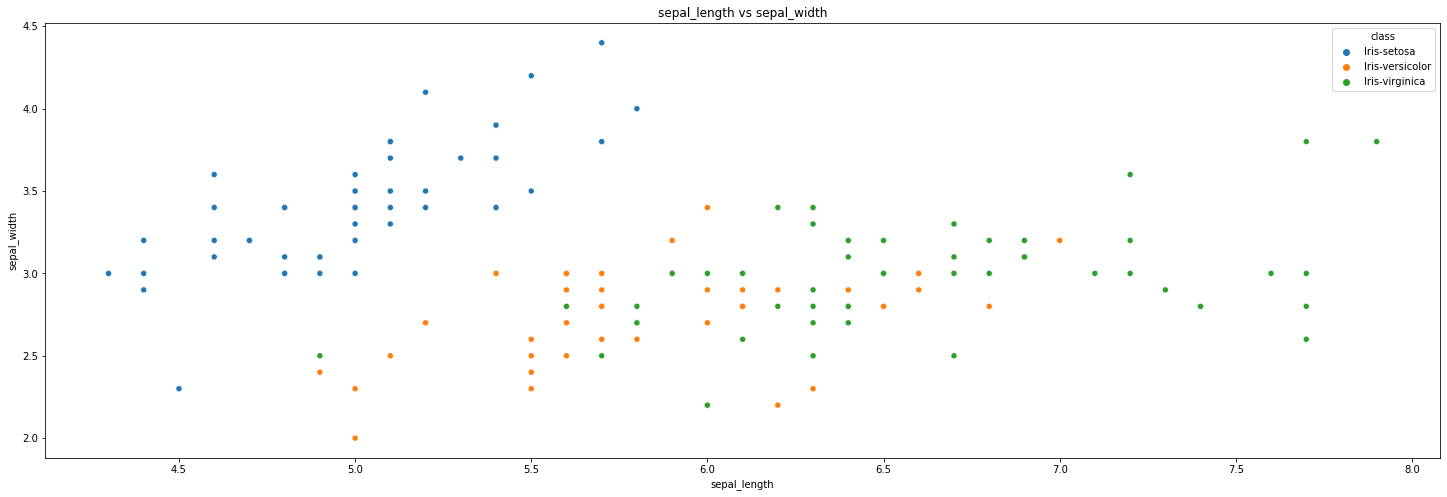

In [8]:
# scatter plot to see relationships between different attributes
x4 = x
graphext.scatterplot(x4, "sepal_length", "sepal_width", "class", yfigsize = 8)

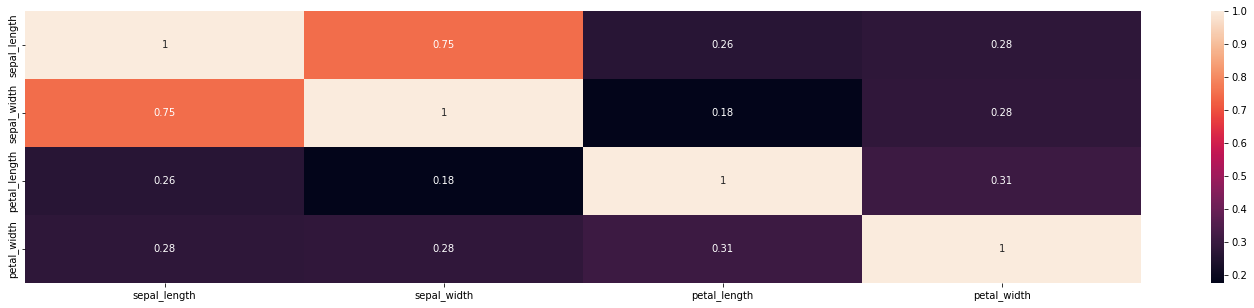

In [9]:
# correlation heatmap for finding correlation between lot of attributes
x5 = x \
    .eq_str("class", "Iris-setosa")

graphext.corr_heatmap(x5, ["sepal_length", "sepal_width", "petal_length", "petal_width"])